# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
time.sleep(1)


# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
#output_city = ("..", "output_data", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
weather_api_key

'225c18cf38bf325bef3e0918e6e1ec93'

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
counter = 1
count_record = 0
print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    if count_record < 50:
        count_record =+ 1
    else:
        counter =+ 1
    print(print(f"Processing Record {count_record} of Set {counter} : {city}"))
print('-----------------------------')
print('Data Retrieval Complete ')
print('-----------------------------') 

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 : oktyabrskoye
None
Processing Record 1 of Set 1 : amga
None
Processing Record 1 of Set 1 : oron
None
Processing Record 1 of Set 1 : nikolskoye
None
Processing Record 1 of Set 1 : dingle
None
Processing Record 1 of Set 1 : sarangani
None
Processing Record 1 of Set 1 : mataura
None
Processing Record 1 of Set 1 : avera
None
Processing Record 1 of Set 1 : hobart
None
Processing Record 1 of Set 1 : tabiauea
None
Processing Record 1 of Set 1 : moiyabana
None
Processing Record 1 of Set 1 : castro
None
Processing Record 1 of Set 1 : gaziantep
None
Processing Record 1 of Set 1 : rikitea
None
Processing Record 1 of Set 1 : grand river south east
None
Processing Record 1 of Set 1 : albany
None
Processing Record 1 of Set 1 : fuxin
None
Processing Record 1 of Set 1 : kaitangata
None
Processing Record 1 of Set 1 : kuching
None
Processing Record 1 of Set 1 : cayenne
None
Processing Record 1 of Set 1 : bathsheba
None


None
Processing Record 1 of Set 1 : santa lucia
None
Processing Record 1 of Set 1 : zarubino
None
Processing Record 1 of Set 1 : price
None
Processing Record 1 of Set 1 : grajau
None
Processing Record 1 of Set 1 : inta
None
Processing Record 1 of Set 1 : itauna
None
Processing Record 1 of Set 1 : skiros
None
Processing Record 1 of Set 1 : tlahualilo
None
Processing Record 1 of Set 1 : kawerau
None
Processing Record 1 of Set 1 : krasnoarmeysk
None
Processing Record 1 of Set 1 : hegang
None
Processing Record 1 of Set 1 : qasigiannguit
None
Processing Record 1 of Set 1 : belfort
None
Processing Record 1 of Set 1 : tabou
None
Processing Record 1 of Set 1 : sol-iletsk
None
Processing Record 1 of Set 1 : palana
None
Processing Record 1 of Set 1 : wakkanai
None
Processing Record 1 of Set 1 : linfen
None
Processing Record 1 of Set 1 : xifeng
None
Processing Record 1 of Set 1 : jining
None
Processing Record 1 of Set 1 : buariki
None
Processing Record 1 of Set 1 : nieuw amsterdam
None
Processing

In [10]:
base = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

url = f"{base}appid={weather_api_key}&units={units}&q="

city_name = []
wind = []
cloudy = []
country =[]
date = []
humidity = []
temp =[]
lat = []
long = []
wind = []
response_store = []
weather_list = []

for city in cities:
    response = requests.get(url+city).json()
    response_store.append(response)

In [ ]:
for response in response_store:
    try:
        city_name = response['name']
        cloud = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        temp = response['main']['temp_max']
        lat = response['coord']['lat']
        long = response['coord']['lon']
        wind = response['wind']['speed']
        country = response['sys']['country']
        
        weather_dict = {"City":city_name,'Lat':lat,'Lng':long,'Max Temp':temp,'Humidity':humidity,'Cloudiness':cloud,'Wind Speed':wind,'Country':country,'Date':date}
        weather_list.append(weather_dict)
    except:
        pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
new_weather = pd.DataFrame(weather_list)
new_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvík,62.2266,-6.5890,40.12,76,100,20.60,FO,1621382675
1,Biltine,14.5333,20.9167,84.78,12,6,3.18,TD,1621382675
2,Fairbanks,64.8378,-147.7164,62.56,32,75,12.66,US,1621382652
3,Bredasdorp,-34.5322,20.0403,53.26,73,59,2.71,ZA,1621382675
4,Bathsheba,13.2167,-59.5167,81.21,73,40,14.61,BB,1621382676


In [13]:
new_weather.to_csv('city_csv',index=False)

In [14]:
new_weather.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [15]:
new_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,22.411478,16.196064,63.934143,69.578571,58.962500,7.985250,1.621383e+09
std,33.360143,91.234717,16.853590,20.753539,38.080092,5.397723,7.680519e+01
min,-54.800000,-179.166700,14.740000,8.000000,0.000000,0.000000,1.621382e+09
25%,-3.740225,-64.662050,53.012500,60.000000,20.000000,4.000000,1.621383e+09
50%,27.705900,21.353050,66.605000,74.000000,72.000000,6.700000,1.621383e+09
75%,50.337325,96.077125,77.275000,85.000000,97.250000,11.010000,1.621383e+09
max,78.218600,179.316700,104.140000,100.000000,100.000000,27.650000,1.621383e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
df_query = new_weather['Humidity']<=100
new_df_humidity = new_weather[df_query]
new_df_humidity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvík,62.2266,-6.5890,40.12,76,100,20.60,FO,1621382675
1,Biltine,14.5333,20.9167,84.78,12,6,3.18,TD,1621382675
2,Fairbanks,64.8378,-147.7164,62.56,32,75,12.66,US,1621382652
3,Bredasdorp,-34.5322,20.0403,53.26,73,59,2.71,ZA,1621382675
4,Bathsheba,13.2167,-59.5167,81.21,73,40,14.61,BB,1621382676


In [17]:
new_df_humidity.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

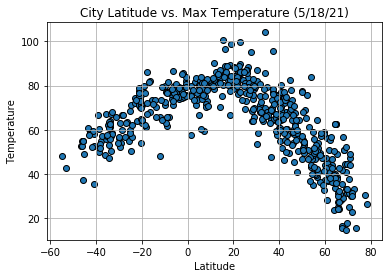

<Figure size 432x288 with 0 Axes>

In [36]:
x_values = new_weather['Lat']
y_values = new_weather['Max Temp']
plt.scatter(x_values,y_values, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid()
plt.title('City Latitude vs. Max Temperature (5/18/21)')
plt.show()
plt.savefig('Fig 1 temp.png')

## Latitude vs. Humidity Plot

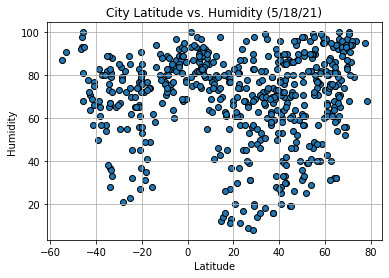

<Figure size 432x288 with 0 Axes>

In [37]:
x_values = new_weather['Lat']
y_values = new_weather['Humidity']
plt.scatter(x_values,y_values, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.title('City Latitude vs. Humidity (5/18/21)')
plt.show()
plt.savefig('fig 2 humidity.png')

## Latitude vs. Cloudiness Plot

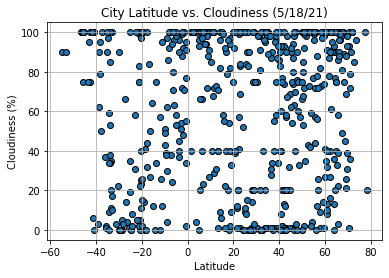

<Figure size 432x288 with 0 Axes>

In [38]:
x_values = new_weather['Lat']
y_values = new_weather['Cloudiness']
plt.scatter(x_values,y_values, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs. Cloudiness (5/18/21)')
plt.show()
plt.savefig('fig 3 cloud.png')

## Latitude vs. Wind Speed Plot

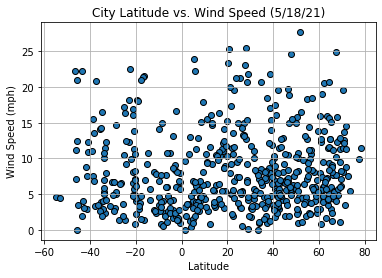

<Figure size 432x288 with 0 Axes>

In [39]:
x_values = new_weather['Lat']
y_values = new_weather['Wind Speed']
plt.scatter(x_values,y_values, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs. Wind Speed (5/18/21)')
plt.show()
plt.savefig('lat v wind fig.png')

## Linear Regression

In [22]:
North = new_weather['Lat']>=0
north_h = new_weather[North]
north_h.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvík,62.2266,-6.5890,40.12,76,100,20.60,FO,1621382675
1,Biltine,14.5333,20.9167,84.78,12,6,3.18,TD,1621382675
2,Fairbanks,64.8378,-147.7164,62.56,32,75,12.66,US,1621382652
4,Bathsheba,13.2167,-59.5167,81.21,73,40,14.61,BB,1621382676
5,Pereyaslovskaya,45.8412,39.0238,58.53,86,94,5.61,RU,1621382676


In [23]:
South = new_weather['Lat']<0
South_h = new_weather[South]
South_h.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Bredasdorp,-34.5322,20.0403,53.26,73,59,2.71,ZA,1621382675
6,Busselton,-33.6500,115.3333,57.09,79,35,2.37,AU,1621382676
10,Zvishavane,-20.3267,30.0665,53.89,91,0,0.78,ZW,1621382677
11,Kaitangata,-46.2817,169.8464,54.93,93,100,11.21,NZ,1621382677
12,Richards Bay,-28.7830,32.0377,66.58,79,0,14.67,ZA,1621382678


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.77x +93.4
The r-value is: 0.6892920587017767


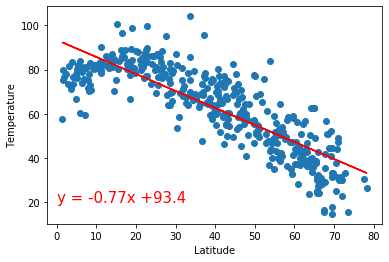

<Figure size 432x288 with 0 Axes>

In [40]:
# Create Plot
x_values = north_h['Lat']
y_values = north_h['Max Temp']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
#Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig('Nort v temp fig.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.62x +80.2
The r-value is: 0.6409978914047254


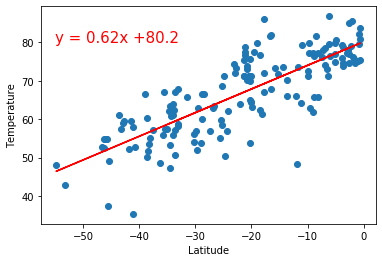

<Figure size 432x288 with 0 Axes>

In [41]:
# Create Plot
x_values = South_h['Lat']
y_values = South_h['Max Temp']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig('south v temp fig .png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.1x +64.9
The r-value is: 0.007532809806002978


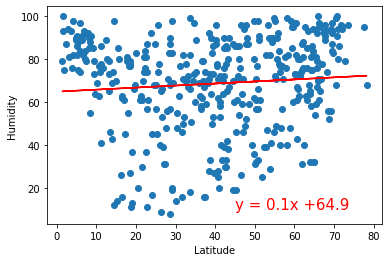

<Figure size 432x288 with 0 Axes>

In [42]:
# Create Plot
x_values = north_h['Lat']
y_values = north_h['Humidity']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig('north v humidity fig .png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.2x +76.25
The r-value is: 0.027295938573309843


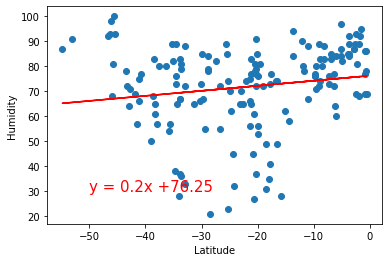

<Figure size 432x288 with 0 Axes>

In [43]:
# Create Plot
x_values = South_h['Lat']
y_values = South_h['Humidity']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig('south v humidity fig.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.04x +59.81
The r-value is: 0.00042578245218456316


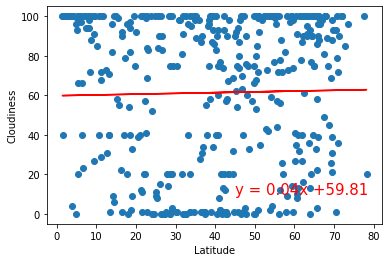

<Figure size 432x288 with 0 Axes>

In [44]:
# Create Plot
x_values = north_h['Lat']
y_values = north_h['Cloudiness']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

plt.savefig('north v cloud.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.04x +53.69
The r-value is: 0.00019642766198240316


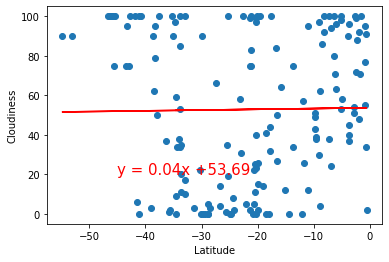

<Figure size 432x288 with 0 Axes>

In [45]:
# Create Plot
x_values = South_h['Lat']
y_values = South_h['Cloudiness']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

plt.savefig('South v cloud fig.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.01x +7.84
The r-value is: 0.0012105136031771576


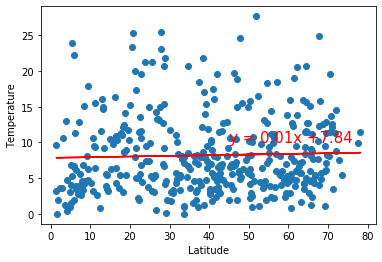

<Figure size 432x288 with 0 Axes>

In [46]:
# Create Plot
x_values = north_h['Lat']
y_values = north_h['Wind Speed']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

plt.savefig('north v wind fig.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.08x +5.69
The r-value is: 0.04011280497281178


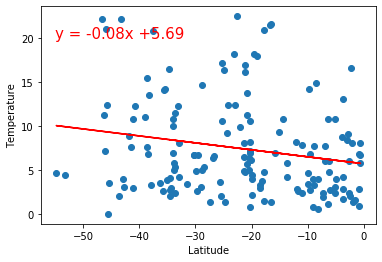

<Figure size 432x288 with 0 Axes>

In [47]:
# Create Plot
x_values = South_h['Lat']
y_values = South_h['Wind Speed']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Get regression values
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
plt.savefig('south v wind fig.png')

There is a negative correlation between North Hemisphere Latitude and max temperature

There is a positive correlation between South Hemisphere Latitude and max temperature

There is no correlation in both North and South Hemisphere's Latitude and Humidity

There is no correlation in both North and South Hemsphere's Latitiude and Cloudiness

There is no correlation in both North and South Hemsphere's Latitude and Windspeed



There is a positive relationship with South Hemisphere Latitude and max temp since the r-value is .62
There is a fairly strong negative relationship with North Hemisphere Latitude and max temp since the r-value is -.77